In [1]:
import os
import shutil
import itertools
import pathlib
from PIL import Image


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths =[]
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [3]:
train_df

,filepaths,label
0,C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa ...,glioma
1,C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa ...,glioma
2,C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa ...,glioma
3,C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa ...,glioma
4,C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa ...,glioma
...,...,...
5707,C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa ...,pituitary
5708,C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa ...,pituitary
5709,C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa ...,pituitary
5710,C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa ...,pituitary


In [4]:
import os
import cv2
import numpy as np
import pandas as pd

train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths = []
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

images = []
for filepath in filepaths:
    img = cv2.imread(filepath)
    # Resize the image to a fixed size
    img = cv2.resize(img, (100, 100))  # Adjust the size as needed
    img_vector = img.flatten()
    # Append the image vector to the list
    images.append(img_vector)

# Convert the images list to a numpy array
images_array = np.array(images)

# Create DataFrame
Fseries = pd.Series(images_array.tolist(), name='image_vector')
Lseries = pd.Series(labels, name='label')
train_df = pd.concat([Fseries, Lseries], axis=1)

print(train_df)


                                           image_vector      label
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     glioma
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     glioma
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     glioma
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     glioma
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     glioma
...                                                 ...        ...
5707  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  pituitary
5708  [0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, ...  pituitary
5709  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...  pituitary
5710  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  pituitary
5711  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  pituitary

[5712 rows x 2 columns]


In [5]:
import os
import cv2
import numpy as np
import pandas as pd

# Assuming this code was executed before
train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths = []
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

# Initialize empty lists to store image data
images = []
for filepath in filepaths:
    # Read image using OpenCV
    img = cv2.imread(filepath)
    # Resize the image to a fixed size
    img = cv2.resize(img, (100, 100)) 
    img_vector = img.flatten()
    # Append the image vector to the list
    images.append(img_vector)

# Convert the images list to a numpy array
images_array = np.array(images)

# Create DataFrame
Fseries = pd.Series(images_array.tolist(), name='image_vector')
Lseries = pd.Series(labels, name='label')
train_df = pd.concat([Fseries, Lseries], axis=1)

# Calculate intraclass spread and interclass distances
class_labels = train_df['label'].unique()

# Initialize empty dictionaries to store mean vectors and spread vectors for each class
class_mean_vectors = {}
class_spread_vectors = {}

# Calculate mean vector and spread vector for each class
for label in class_labels:
    # Filter images belonging to the current class
    class_images = train_df[train_df['label'] == label]['image_vector']
    
    # Convert the image vectors to NumPy arrays
    class_images_array = np.array([np.array(image) for image in class_images])
    
    # Calculate mean vector for the current class
    mean_vector = np.mean(class_images_array, axis=0)
    class_mean_vectors[label] = mean_vector
    
    # Calculate spread vector for the current class
    spread_vector = np.std(class_images_array, axis=0)
    class_spread_vectors[label] = spread_vector

# Calculate interclass distances between mean vectors
interclass_distances = {}
for i in range(len(class_labels)):
    for j in range(i + 1, len(class_labels)):
        class1 = class_labels[i]
        class2 = class_labels[j]
        centroid1 = class_mean_vectors[class1]
        centroid2 = class_mean_vectors[class2]
        distance = np.linalg.norm(centroid1 - centroid2)
        interclass_distances[(class1, class2)] = distance

# Print intraclass spread and interclass distances
print("Intraclass Spread (Standard Deviation):")
for label, spread_vector in class_spread_vectors.items():
    print(f"{label}: {spread_vector}")

print("\nInterclass Distances between Mean Vectors:")
for classes, distance in interclass_distances.items():
    print(f"{classes[0]} - {classes[1]}: {distance}")


Intraclass Spread (Standard Deviation):
glioma: [0.10276846 0.10276846 0.10276846 ... 0.07269587 0.07269587 0.07269587]
meningioma: [ 9.79214224  9.79214224  9.79214224 ... 10.43629164 10.43629164
 10.43629164]
notumor: [33.97686755 33.66410904 33.59559123 ... 37.60917814 37.33283787
 37.2738257 ]
pituitary: [5.03742469 5.03742469 5.03742469 ... 3.94969365 3.94969365 3.94969365]

Interclass Distances between Mean Vectors:
glioma - meningioma: 2140.8735005671606
glioma - notumor: 5444.0055166350985
glioma - pituitary: 3872.8915382706755
meningioma - notumor: 3553.2791063564077
meningioma - pituitary: 2893.868747047778
notumor - pituitary: 3949.006525918204


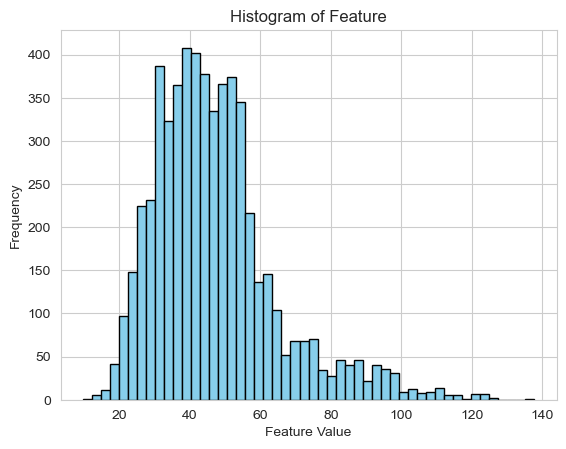

Mean: 47.19229390756302
Variance: 311.43085780228586


In [6]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths = []
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

images = []
for filepath in filepaths:
    img = cv2.imread(filepath)
    # Resize the image to a fixed size
    img = cv2.resize(img, (100, 100))  # Adjust the size as needed
    img_vector = img.flatten()
    # Append the feature (for example, pixel intensity) to the list
    feature_value = np.mean(img_vector)  # Example: using mean pixel intensity as the feature
    images.append(feature_value)

# Convert the feature values list to a numpy array
feature_array = np.array(images)

# Plot histogram
plt.hist(feature_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Feature')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate mean and variance
mean_value = np.mean(feature_array)
variance_value = np.var(feature_array)

print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")


In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths = []
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

images = []
for filepath in filepaths:
    img = cv2.imread(filepath)
    # Resize the image to a fixed size
    img = cv2.resize(img, (100, 100))  # Adjust the size as needed
    img_vector = img.flatten()
    # Append the feature vector to the list
    images.append(img_vector)

# Convert the feature vectors list to a numpy array
X = np.array(images)
y = np.array(labels)

# Divide the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)




In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# Applying RandomSearchCV() for a single perceptron AND gate
print(" finding AND gate using the suitable Hyperparameters and applying RandomSearchCV()")
# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
# Define the model and hyperparameter distributions
model = LogisticRegression(random_state=42)
param_dist = {'C': uniform(loc=0, scale=4),
              'penalty': ['l1', 'l2']}
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42,
                                   n_jobs=-1, verbose=1)
# Fit the RandomizedSearchCV object to the data
random_search.fit(X, y)
# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_:.4f}")

 finding AND gate using the suitable Hyperparameters and applying RandomSearchCV()
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'C': 0.0031150633640573133, 'penalty': 'l2'}
Best score: 0.8670


In [9]:
import numpy as np

def calculate_entropy(y):
    """
    Calculate the entropy of a given target variable.
    """
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Add a small value to avoid log(0)
    return entropy

def calculate_information_gain(X, y, feature_idx):
    """
    Calculate the information gain for a specific feature.
    """
    # Calculate total entropy before split
    total_entropy = calculate_entropy(y)
    
    # Calculate entropy after split based on the feature
    unique_values, counts = np.unique(X[:, feature_idx], return_counts=True)
    weighted_entropy = 0
    for value, count in zip(unique_values, counts):
        subset_y = y[X[:, feature_idx] == value]
        subset_entropy = calculate_entropy(subset_y)
        weighted_entropy += (count / len(y)) * subset_entropy
    
    # Calculate information gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

def find_root_node(X, y):
    """
    Find the root node attribute with the highest information gain.
    """
    num_features = X.shape[1]
    best_feature_idx = None
    best_information_gain = -1
    
    for i in range(num_features):
        information_gain = calculate_information_gain(X, y, i)
        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_feature_idx = i
    
    return best_feature_idx


# Find the root node attribute with the highest information gain
root_node_idx = find_root_node(X_train, y_train)
print("Root node attribute index:", root_node_idx)


Root node attribute index: 3225


In [11]:
import numpy as np

def bin_continuous_feature(feature, bins=None, binning_type='equal_width'):
    """
    Bins a continuous-valued feature into categorical values.

    Parameters:
    - feature: numpy array, the continuous-valued feature to be binned.
    - bins: int or list, optional, the number of bins to create or the bin edges.
            If None, default to 10 bins.
    - binning_type: str, optional, the type of binning to perform.
                    Can be 'equal_width' or 'frequency'. Default is 'equal_width'.

    Returns:
    - numpy array, the binned feature with categorical values.
    """
    if binning_type == 'equal_width':
        if bins is None:
            bins = 10
        return np.digitize(feature, np.linspace(feature.min(), feature.max(), bins + 1))

    elif binning_type == 'frequency':
        if bins is None:
            bins = 10
        return np.digitize(feature, np.histogram_bin_edges(feature, bins=bins))

    else:
        raise ValueError("Invalid binning_type. Choose 'equal_width' or 'frequency'.")

# Example usage:
# Generate some continuous-valued feature data
continuous_feature = np.random.randn(100)

# Bin the continuous feature using equal width binning with default number of bins
binned_feature_equal_width_default = bin_continuous_feature(continuous_feature)
print("Binned feature (Equal Width - Default Bins):", binned_feature_equal_width_default)

# Bin the continuous feature using equal width binning with 5 bins
binned_feature_equal_width_5_bins = bin_continuous_feature(continuous_feature, bins=5)
print("Binned feature (Equal Width - 5 Bins):", binned_feature_equal_width_5_bins)

# Bin the continuous feature using frequency binning with default number of bins
binned_feature_frequency_default = bin_continuous_feature(continuous_feature, binning_type='frequency')
print("Binned feature (Frequency - Default Bins):", binned_feature_frequency_default)

# Bin the continuous feature using frequency binning with 5 bins
binned_feature_frequency_5_bins = bin_continuous_feature(continuous_feature, bins=5, binning_type='frequency')
print("Binned feature (Frequency - 5 Bins):", binned_feature_frequency_5_bins)


Binned feature (Equal Width - Default Bins): [ 4  6  5  7  4  8  2  9  7  7  9  3  7  4  5  6  4  2  3  8  9  3  3 10
  7  4  4  5  3  9  4  4  9  4  5  2  9  4  7 10  7  4  4  4  3 10  9  7
  5  3 11  4  6  6  3  9  4  6  5  6  2  2  5  6  7  8  1  3  6  5  2  2
  6  5 10  7  4  3  5  6  6  3  8  7  3  4  5  5  1 10  7  1  4  4  4  1
  8  7  8  9]
Binned feature (Equal Width - 5 Bins): [2 3 3 4 2 4 1 5 4 4 5 2 4 2 3 3 2 1 2 4 5 2 2 5 4 2 2 3 2 5 2 2 5 2 3 1 5
 2 4 5 4 2 2 2 2 5 5 4 3 2 6 2 3 3 2 5 2 3 3 3 1 1 3 3 4 4 1 2 3 3 1 1 3 3
 5 4 2 2 3 3 3 2 4 4 2 2 3 3 1 5 4 1 2 2 2 1 4 4 4 5]
Binned feature (Frequency - Default Bins): [ 4  6  5  7  4  8  2  9  7  7  9  3  7  4  5  6  4  2  3  8  9  3  3 10
  7  4  4  5  3  9  4  4  9  4  5  2  9  4  7 10  7  4  4  4  3 10  9  7
  5  3 11  4  6  6  3  9  4  6  5  6  2  2  5  6  7  8  1  3  6  5  2  2
  6  5 10  7  4  3  5  6  6  3  8  7  3  4  5  5  1 10  7  1  4  4  4  1
  8  7  8  9]
Binned feature (Frequency - 5 Bins): [2 3 3 4 2 4 1 5 4 4

In [12]:
import numpy as np

class TreeNode:
    def __init__(self, feature_index=None, threshold=None, value=None, left=None, right=None):
        self.feature_index = feature_index  # Index of the feature to split on
        self.threshold = threshold  # Threshold value for binary split
        self.value = value  # Value to predict if leaf node
        self.left = left  # Left child node
        self.right = right  # Right child node

def calculate_entropy(y):
    """
    Calculate the entropy of a given target variable.
    """
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Add a small value to avoid log(0)
    return entropy

def calculate_information_gain(X, y, feature_idx):
    """
    Calculate the information gain for a specific feature.
    """
    # Calculate total entropy before split
    total_entropy = calculate_entropy(y)
    
    # Calculate entropy after split based on the feature
    unique_values, counts = np.unique(X[:, feature_idx], return_counts=True)
    weighted_entropy = 0
    for value, count in zip(unique_values, counts):
        subset_y = y[X[:, feature_idx] == value]
        subset_entropy = calculate_entropy(subset_y)
        weighted_entropy += (count / len(y)) * subset_entropy
    
    # Calculate information gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

def bin_continuous_feature(feature, bins=None, binning_type='equal_width'):
    """
    Bins a continuous-valued feature into categorical values.

    Parameters:
    - feature: numpy array, the continuous-valued feature to be binned.
    - bins: int or list, optional, the number of bins to create or the bin edges.
            If None, default to 10 bins.
    - binning_type: str, optional, the type of binning to perform.
                    Can be 'equal_width' or 'frequency'. Default is 'equal_width'.

    Returns:
    - numpy array, the binned feature with categorical values.
    """
    if binning_type == 'equal_width':
        if bins is None:
            bins = 10
        return np.digitize(feature, np.linspace(feature.min(), feature.max(), bins + 1))

    elif binning_type == 'frequency':
        if bins is None:
            bins = 10
        return np.digitize(feature, np.histogram_bin_edges(feature, bins=bins))

    else:
        raise ValueError("Invalid binning_type. Choose 'equal_width' or 'frequency'.")

def find_root_node(X, y, binning_type='equal_width', bins=None):
    """
    Find the root node attribute with the highest information gain.

    Parameters:
    - X: numpy array, the feature matrix.
    - y: numpy array, the target variable.
    - binning_type: str, optional, the type of binning to perform.
                    Can be 'equal_width' or 'frequency'. Default is 'equal_width'.
    - bins: int or list, optional, the number of bins to create or the bin edges.

    Returns:
    - int, the index of the feature to be used as the root node attribute.
    """
    num_features = X.shape[1]
    best_feature_idx = None
    best_information_gain = -1
    
    for i in range(num_features):
        if len(np.unique(X[:, i])) == 1:  # Skip features with only one unique value
            continue

        if np.issubdtype(X[:, i].dtype, np.floating):  # Continuous-valued feature
            binned_feature = bin_continuous_feature(X[:, i], bins=bins, binning_type=binning_type)
            information_gain = calculate_information_gain(binned_feature, y, i)
        else:  # Categorical feature
            information_gain = calculate_information_gain(X, y, i)

        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_feature_idx = i
    
    return best_feature_idx

def build_decision_tree(X, y, binning_type='equal_width', bins=None):
    """
    Build a decision tree recursively.

    Parameters:
    - X: numpy array, the feature matrix.
    - y: numpy array, the target variable.
    - binning_type: str, optional, the type of binning to perform.
                    Can be 'equal_width' or 'frequency'. Default is 'equal_width'.
    - bins: int or list, optional, the number of bins to create or the bin edges.

    Returns:
    - TreeNode, the root node of the decision tree.
    """
    if len(np.unique(y)) == 1:  # If all samples in node have the same class, return leaf node
        return TreeNode(value=y[0])

    root_feature_idx = find_root_node(X, y, binning_type=binning_type, bins=bins)

    if root_feature_idx is None:  # If no feature provides information gain, return leaf node
        return TreeNode(value=Counter(y).most_common(1)[0][0])

    if np.issubdtype(X[:, root_feature_idx].dtype, np.floating):  # Continuous-valued feature
        binned_feature = bin_continuous_feature(X[:, root_feature_idx], bins=bins, binning_type=binning_type)
        threshold = np.median(binned_feature)
        left_indices = np.where(binned_feature <= threshold)[0]
        right_indices = np.where(binned_feature > threshold)[0]
        left_child = build_decision_tree(X[left_indices], y[left_indices], binning_type=binning_type, bins=bins)
        right_child = build_decision_tree(X[right_indices], y[right_indices], binning_type=binning_type, bins=bins)
        return TreeNode(feature_index=root_feature_idx, threshold=threshold, left=left_child, right=right_child)

    else:  # Categorical feature
        unique_values = np.unique(X[:, root_feature_idx])
        children = {}
        for value in unique_values:
            indices = np.where(X[:, root_feature_idx] == value)[0]
            children[value] = build_decision_tree(X[indices], y[indices], binning_type=binning_type, bins=bins)
        return TreeNode(feature_index=root_feature_idx, value=children)

# Example usage with the provided dataset
# Assuming X_train is your feature matrix and y_train is your target variable
# Replace this with your actual dataset

# Build the decision tree
decision_tree = build_decision_tree(X_train, y_train)

# Example usage: Predict using the decision tree
def predict(tree, sample):
    if tree.value is not None:  # If leaf node, return value
        return tree.value
    elif np.issubdtype(sample[tree.feature_index].dtype, np.floating):  # Continuous-valued feature
        if sample[tree.feature_index] <= tree.threshold:
            return predict(tree.left, sample)
        else:
            return predict(tree.right, sample)
    else:  # Categorical feature
        child = tree.value.get(sample[tree.feature_index])
        if child is None:
            return None  # Missing value, return None
        else:
            return predict(child, sample)

# Example usage: Predict using the decision tree
sample = np.array(images)
print("Prediction:", predict(decision_tree, sample))


Prediction: {0: <__main__.TreeNode object at 0x00000229CBD30950>, 1: <__main__.TreeNode object at 0x00000229CBD0E610>, 2: <__main__.TreeNode object at 0x00000229CBD939D0>, 3: <__main__.TreeNode object at 0x00000229CBDAEED0>, 4: <__main__.TreeNode object at 0x00000229CBDC4490>, 5: <__main__.TreeNode object at 0x00000229CBDD2690>, 6: <__main__.TreeNode object at 0x00000229CBDD7450>, 7: <__main__.TreeNode object at 0x00000229CBDE3450>, 8: <__main__.TreeNode object at 0x00000229CBDE9690>, 9: <__main__.TreeNode object at 0x00000229CBDEB710>, 10: <__main__.TreeNode object at 0x00000229CBDEC790>, 11: <__main__.TreeNode object at 0x00000229CBDED590>, 12: <__main__.TreeNode object at 0x00000229CBDEE090>, 13: <__main__.TreeNode object at 0x00000229CBD25F10>, 14: <__main__.TreeNode object at 0x00000229CBD2D750>, 15: <__main__.TreeNode object at 0x00000229CBD16F90>, 16: <__main__.TreeNode object at 0x00000229CBCBD550>, 17: <__main__.TreeNode object at 0x00000229CBC8A0D0>, 18: <__main__.TreeNode ob